<a href="https://colab.research.google.com/github/DennisCG1993/sample/blob/Projeto_Marketing_PCS5787/Projeto_Marketing_Grupo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação dos dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import os
import requests
import sys
from pycocotools.coco import COCO
import urllib
import zipfile 

In [ ]:
link_dataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
filename = 'bank.zip'
urllib.request.urlretrieve(link_dataset , filename=filename)

with zipfile.ZipFile(filename) as z:
    print(*z.namelist(), sep="\n")
    file = z.namelist()[0]
    with z.open(file) as f:
        df = pd.read_csv(f, sep=';',low_memory=False)

bank-full.csv
bank-names.txt
bank.csv


Tratamento dos dados

In [ ]:
y = pd.get_dummies(df['y'], columns ='y', drop_first = True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank_client = df.iloc[: , 0:8]

#Visualização

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df[df.y=='no'])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df[df.y!='no'])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [ ]:
bank_client

,job,marital,education,default,balance,housing,loan
0,management,married,tertiary,no,2143,yes,no
1,technician,single,secondary,no,29,yes,no
2,entrepreneur,married,secondary,no,2,yes,yes
3,blue-collar,married,unknown,no,1506,yes,no
4,unknown,single,unknown,no,1,no,no
...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,825,no,no
45207,retired,divorced,primary,no,1729,no,no
45208,retired,married,secondary,no,5715,no,no
45209,blue-collar,married,secondary,no,668,no,no


#Construção do Modelo

In [ ]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [ ]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

#age(bank_client);
bank_client['age'] = bank_client['age']/bank_client['age'].max()

In [ ]:
bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,0.610526,4,1,2,0,2143,1,0
1,0.463158,9,2,1,0,29,1,0
2,0.347368,2,1,1,0,2,1,1
3,0.494737,1,1,3,0,1506,1,0
4,0.347368,11,2,3,0,1,0,0


In [ ]:
bank_related = df.iloc[: , 8:12]
bank_related.head()

,contact,day,month,duration
0,unknown,5,may,261
1,unknown,5,may,151
2,unknown,5,may,76
3,unknown,5,may,92
4,unknown,5,may,198


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day'] = labelencoder_X.fit_transform(bank_related['day']) 

In [ ]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
#duration(bank_related);
bank_related['duration'] = bank_related['duration']/bank_related['duration'].max()

In [ ]:
bank_o = df.loc[: , ['campaign', 'pdays','previous']]
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)
bank_o.head()

In [ ]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day', 'duration','campaign', 'pdays', 'previous']]
bank_final.shape

In [ ]:
bank_final = bank_final/bank_final.max(axis=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
X_train.head()


,age,job,marital,education,default,housing,loan,contact,month,day,duration,campaign,campaign,pdays,pdays,previous,previous
4596,0.326316,0.090909,1.0,0.333333,0.0,0.0,0.0,1.0,0.727273,0.633333,0.053070,0.015873,0.015873,-0.001148,-0.001148,0.0,0.0
1020,0.378947,0.181818,0.5,0.666667,0.0,1.0,0.0,1.0,0.727273,0.200000,0.070964,0.031746,0.031746,-0.001148,-0.001148,0.0,0.0
16026,0.631579,0.272727,0.5,0.000000,0.0,0.0,1.0,0.5,0.454545,0.700000,0.025214,0.015873,0.015873,-0.001148,-0.001148,0.0,0.0
2085,0.389474,0.090909,0.5,0.333333,0.0,1.0,0.0,1.0,0.727273,0.366667,0.115087,0.111111,0.111111,-0.001148,-0.001148,0.0,0.0
6961,0.315789,0.090909,0.5,0.000000,0.0,1.0,0.0,1.0,0.727273,0.900000,0.032127,0.158730,0.158730,-0.001148,-0.001148,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##SVC

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',probability=True)
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)

In [ ]:
from sklearn.metrics import classification_report

print('SVM Resultado\n',classification_report(y_test, svcpred))

In [ ]:
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy'))

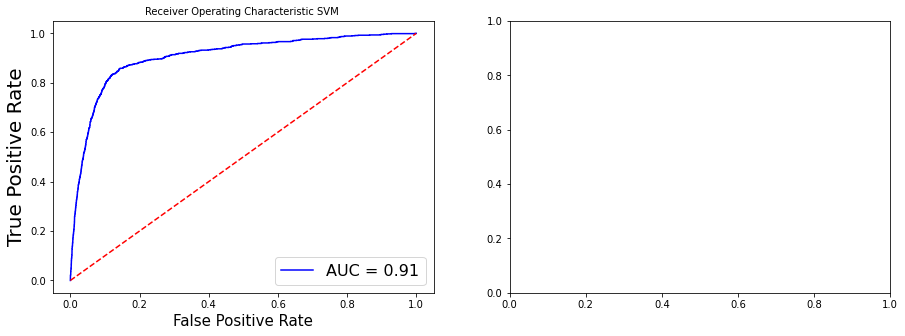

In [ ]:
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = svc.predict_proba(X_test)
preds = probs[:,1]
fprsvc, tprsvc, thresholdsvc = metrics.roc_curve(y_test, preds)
roc_aucsvc = metrics.auc(fprsvc, tprsvc)

ax.plot(fprsvc, tprsvc, 'b', label = 'AUC = %0.2f' % roc_aucsvc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic SVM ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6518  555]
 [ 582  345]]
86.0


In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel = 'linear')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6922  151]
 [ 643  284]]
90.0


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
#KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6962  111]
 [ 684  243]]
90.0
